# MỤC TIÊU
Dự đoán thời gian giao hàng?
bài toán hồi quy

mục tiêu dự đoán số ngày để giao đơn hàng thành công.

# Load và mô tả dữ liệu

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
import pandas as pd

# Base URL (RAW GitHub)
base_url = "https://raw.githubusercontent.com/quanglv03/Ecommerce-Order/main/Ecommerce%20Order%20Dataset"


In [3]:
train_files = {
    "customers": "train/df_Customers.csv",
    "orders": "train/df_Orders.csv",
    "order_items": "train/df_OrderItems.csv",
    "payments": "train/df_Payments.csv",
    "products": "train/df_Products.csv"
}



In [4]:
def load_from_github(base_url, files_dict):
    data = {}
    for key, path in files_dict.items():
        url = f"{base_url}/{path}"
        print(f"Loading: {url}")
        data[key] = pd.read_csv(url)
    return data


In [5]:
train_data = load_from_github(base_url, train_files)

customers_train = train_data["customers"]
orders_train = train_data["orders"]
orderitems_train = train_data["order_items"]
payments_train = train_data["payments"]
products_train = train_data["products"]


Loading: https://raw.githubusercontent.com/quanglv03/Ecommerce-Order/main/Ecommerce%20Order%20Dataset/train/df_Customers.csv
Loading: https://raw.githubusercontent.com/quanglv03/Ecommerce-Order/main/Ecommerce%20Order%20Dataset/train/df_Orders.csv
Loading: https://raw.githubusercontent.com/quanglv03/Ecommerce-Order/main/Ecommerce%20Order%20Dataset/train/df_OrderItems.csv
Loading: https://raw.githubusercontent.com/quanglv03/Ecommerce-Order/main/Ecommerce%20Order%20Dataset/train/df_Payments.csv
Loading: https://raw.githubusercontent.com/quanglv03/Ecommerce-Order/main/Ecommerce%20Order%20Dataset/train/df_Products.csv


In [6]:
# 1. Xem bảng của bảng khách hàng
print("Dữ liệu khách hàng:")
display(customers_train.head())

Dữ liệu khách hàng:


,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP


In [7]:
print("Thông tin chi tiết về các cột trong customers_train:")
customers_train.info()

Thông tin chi tiết về các cột trong customers_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int64 
 2   customer_city             89316 non-null  object
 3   customer_state            89316 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


Mô tả dữ liệu khách hàng
- bảng có 89.316 dòng và 4 cột
- không giá trị nào bị thiếu

Các cột và kiểu dữ liệu:
- customer_id:Mã định danh duy nhất của khách hàng,kiểu dữ liệu dạng object.

- customer_zip_code_prefix: Mã bưu chính của khách hàng, kiểu dữ liệu int64.

- customer_city: Thành phố của khách hàng,kiểu dữ liệu object.

- customer_state: Tiểu bang của khách hàng ,kiểu dữ liệu object.

In [8]:
# 2. Xem  bảng của bảng đơn hàng
print("Dữ liệu đơn hàng:")
display(orders_train.head())

Dữ liệu đơn hàng:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18


In [9]:
print("Thông tin chi tiết về các cột trong orders_train:")
orders_train.info()

Thông tin chi tiết về các cột trong orders_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


Mô tả dữ liệu bảng đơn hàng

* order_id:order_id: Mã định danh duy nhất của đơn hàng, Kiểu dữ liệu object.
customer_id:Mã định danh duy nhất của khách hàng thực hiện đơn hàng, Kiểu dữ liệu object.
* order_status:Trạng thái hiện tại của đơn hàng, Kiểu dữ liệu object.
* order_purchase_timestamp: Đây là thời gian mua hàng, Kiểu dữ liệu object.
* order_approved_at:Đây là thời gian đơn hàng được duyệt, Kiểu dữ liệu object.
* order_delivered_timestamp:Đây là thời gian đơn hàng được giao đến khách hàng, Kiểu dữ liệu object.
* order_estimated_delivery_date:Đây là ngày giao hàng dự kiến, Kiểu dữ liệu object.

In [10]:
# 3. Xem bảng Chi tiết đơn hàng (Order Items)
print("Dữ liệu chi tiết đơn hàng (Order Items):")
display(orderitems_train.head())

Dữ liệu chi tiết đơn hàng (Order Items):


,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66


In [11]:
print("Thông tin chi tiết về bảng Order Items:")
orderitems_train.info()

Thông tin chi tiết về bảng Order Items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          89316 non-null  object 
 1   product_id        89316 non-null  object 
 2   seller_id         89316 non-null  object 
 3   price             89316 non-null  float64
 4   shipping_charges  89316 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.4+ MB


Mô tả dữ liệu bảng chi tiết đơn hàng:
- **order_id**: Mã định danh duy nhất của đơn hàng. Kiểu dữ liệu object.
- **product_id**: Mã định danh duy nhất của sản phẩm. Kiểu dữ liệu object.
- **seller_id**: Mã định danh duy nhất của người bán. Kiểu dữ liệu object.
- **price**: Giá của sản phẩm. Kiểu dữ liệu float.
- **shipping_charges**: Phí vận chuyển cho sản phẩm. Kiểu dữ liệu float .


In [12]:
# 4. Xem bảng Thanh toán (Payments)
print("Dữ liệu thanh toán (Payments):")
display(payments_train.head())


Dữ liệu thanh toán (Payments):


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15


In [13]:
print("Thông tin chi tiết về bảng Payments:")
payments_train.info()


Thông tin chi tiết về bảng Payments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              89316 non-null  object 
 1   payment_sequential    89316 non-null  int64  
 2   payment_type          89316 non-null  object 
 3   payment_installments  89316 non-null  int64  
 4   payment_value         89316 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ MB


Mô tả dữ liệu bảng thanh toán:
- Bảng có 89.316 dòng và 5 cột.
- Không có giá trị nào bị thiếu.

Các cột và kiểu dữ liệu:
- **order_id**: Mã định danh duy nhất của đơn hàng. Kiểu dữ liệu object.
- **payment_sequential**:Thứ tự của khoản thanh toán. Kiểu dữ liệu int64.
- **payment_type**: Loại hình thanh toán. Kiểu dữ liệu object.
- **payment_installments**: Thanh toán trả góp. Kiểu dữ liệu int64.
- **payment_value**: Tổng giá trị của giao dịch thanh toán. Kiểu dữ liệu float64.

In [14]:
# 5. Xem bảng Sản phẩm (Products)
print("Dữ liệu sản phẩm (Products):")
display(products_train.head())

Dữ liệu sản phẩm (Products):


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0


In [15]:
print("Thông tin chi tiết về các cột trong products_train:")
products_train.info()

Thông tin chi tiết về các cột trong products_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             89316 non-null  object 
 1   product_category_name  89008 non-null  object 
 2   product_weight_g       89301 non-null  float64
 3   product_length_cm      89301 non-null  float64
 4   product_height_cm      89301 non-null  float64
 5   product_width_cm       89301 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


Mô tả dữ liệu bảng sản phẩm:
- Bảng có 89.316 dòng và 6 cột.
- Cột product_category_name, product_weight_g, product_length_cm, product_height_cm, product_width_cm có một số giá trị bị thiếu.

Các cột và kiểu dữ liệu:
- **product_id**: Mã định danh duy nhất của sản phẩm. Kiểu dữ liệu object.
- **product_category_name**: Tên danh mục của sản phẩm. Kiểu dữ liệu object.
- **product_weight_g**: Trọng lượng của sản phẩm tính bằng gram. Kiểu dữ liệu float64.
- **product_length_cm**: Chiều dài của sản phẩm (cm). Kiểu dữ liệu float64.
- **product_height_cm**: Chiều cao của sản phẩm (cm). Kiểu dữ liệu float64.
- **product_width_cm**: Chiều rộng của sản phẩm (cm). Kiểu dữ liệu float64.

# Tiền Xử Lý Dữ Liệu

##Merge các bảng



In [16]:
# Merge các bảng
df = orders_train.merge(customers_train, on="customer_id", how="left") \
    .merge(orderitems_train, on="order_id", how="left") \
    .merge(products_train, on="product_id", how="left") \
    .merge(payments_train, on="order_id", how="left")

## Khám phá & Phân tích dữ liệu (EDA)

In [17]:
print("Số dòng:",df.shape[0])
print("Số cột:",df.shape[1])

Số dòng: 2529486
Số cột: 23


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529486 entries, 0 to 2529485
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   customer_id                    object 
 2   order_status                   object 
 3   order_purchase_timestamp       object 
 4   order_approved_at              object 
 5   order_delivered_timestamp      object 
 6   order_estimated_delivery_date  object 
 7   customer_zip_code_prefix       int64  
 8   customer_city                  object 
 9   customer_state                 object 
 10  product_id                     object 
 11  seller_id                      object 
 12  price                          float64
 13  shipping_charges               float64
 14  product_category_name          object 
 15  product_weight_g               float64
 16  product_length_cm              float64
 17  product_height_cm              float64
 18  pr

In [19]:
print("Kiểm tra lại giá trị thiếu sau khi xử lý:")
display(df.isnull().sum())

Kiểm tra lại giá trị thiếu sau khi xử lý:


order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  199
order_delivered_timestamp        36051
order_estimated_delivery_date        0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
product_id                           0
seller_id                            0
price                                0
shipping_charges                     0
product_category_name             1408
product_weight_g                   197
product_length_cm                  197
product_height_cm                  197
product_width_cm                   197
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
dtype: int64

In [20]:
print(f"Số lượng hàng trùng lặp trước khi xử lý: {df.duplicated().sum()}")


Số lượng hàng trùng lặp trước khi xử lý: 2440170


Nhận xet:
* Dữ liệu gồm nhiều bảng được gộp từ đơn hàng, khách hàng, sản phẩm và thanh toán.
*   **`order_approved_at`**: Có 199 giá trị thiếu. Đây là thời gian đơn hàng được duyệt. Nếu thiếu, có thể ảnh hưởng đến việc tính toán các mốc thời gian. Có thể điền bằng thời gian `order_purchase_timestamp` hoặc loại bỏ các dòng này tùy vào mục đích phân tích.
*   **`product_category_name`**: Có 1408 giá trị thiếu. Có thể điền bằng một giá trị 'unknown' đánh dấu đây là sản phẩm không xác định hoặc loại bỏ các dòng này.
*   **`product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`**: Có 	197 giá trị thiếu. Đây là các thuộc tính vật lý của sản phẩm. Có thể điền bằng giá trị trung bình/trung vị hoặc loại bỏ các dòng này.
* `order_delivered_timestamp`:có 36051 giá trị thiếu, đánh dấu là sản phẩm chưa giao thành công hoặc bị hủy -> loại bỏ khỏi tập dữ liệu huấn luyện.

* Số lượng hàng trùng lặp trước khi xử lý:

* Chuẩn hóa kiểu dữ liệu:`order_purchase_timestamp`,`order_approved_at`,`order_delivered_timestamp`,`order_estimated_delivery_date` thành datetime

## Xử Lý Trùng Lặp

In [21]:
# Loại bỏ dữ liệu trùng lặp
df = df.drop_duplicates()

print("Số lượng hàng trùng lặp sau khi xử lý:", df.duplicated().sum())
print("Kích thước dữ liệu sau xử lý:", df.shape)


Số lượng hàng trùng lặp sau khi xử lý: 0
Kích thước dữ liệu sau xử lý: (89316, 23)


## Xử Lý Missing

In [22]:

# --- 1. Chuyển các cột thời gian sang datetime ---
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_approved_at"] = pd.to_datetime(df["order_approved_at"])
df["order_delivered_timestamp"] = pd.to_datetime(df["order_delivered_timestamp"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

# --- 2. Xử lý missing values ---

# 2.1 order_approved_at → điền bằng order_purchase_timestamp
df["order_approved_at"] = df["order_approved_at"].fillna(
    df["order_purchase_timestamp"]
)

# 2.2 product_category_name → điền bằng "unknown"
df["product_category_name"] = df["product_category_name"].fillna("unknown")

# 2.3 Thuộc tính vật lý sản phẩm → điền median
product_cols = [
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

for col in product_cols:
    df[col] = df[col].fillna(df[col].median())

# 2.4 Loại bỏ đơn hàng chưa giao thành công or bị hủy
df = df[df["order_delivered_timestamp"].notnull()]


In [23]:
# --- 6. Kiểm tra lại dữ liệu ---
print("Kích thước dữ liệu sau khi làm sạch:", df.shape)
print("\nSố giá trị thiếu còn lại:")
display(df.isnull().sum())

Kích thước dữ liệu sau khi làm sạch: (87427, 23)

Số giá trị thiếu còn lại:


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

Nhận Xét:
* Dữ liệu được làm sạch thông qua việc xử lý giá trị thiếu,loại bỏ các đơn hàng
chưa giao thành công, xóa các bản ghi trùng lặp phát sinh do quá trình gộp bảng
* Kích thước dữ liệu sau khi làm sạch: (87427, 23)

##Phân tích dữ liệu (EDA)

In [24]:
# Tạo bản sao dữ liệu để phục vụ EDA
eda_df = df.copy()

# Chuyển datetime (CHỈ TRÊN eda_df)
eda_df["order_purchase_timestamp"] = pd.to_datetime(
    eda_df["order_purchase_timestamp"], errors="coerce"
)
eda_df["order_approved_at"] = pd.to_datetime(
    eda_df["order_approved_at"], errors="coerce"
)
eda_df["order_delivered_timestamp"] = pd.to_datetime(
    eda_df["order_delivered_timestamp"], errors="coerce"
)

# Tạo biến mục tiêu cho EDA
eda_df["delivery_days"] = (
    eda_df["order_delivered_timestamp"] - eda_df["order_purchase_timestamp"]
).dt.days

# Lọc dữ liệu hợp lệ cho EDA
eda_df = eda_df[
    eda_df["delivery_days"].notnull() & (eda_df["delivery_days"] >= 0)
]




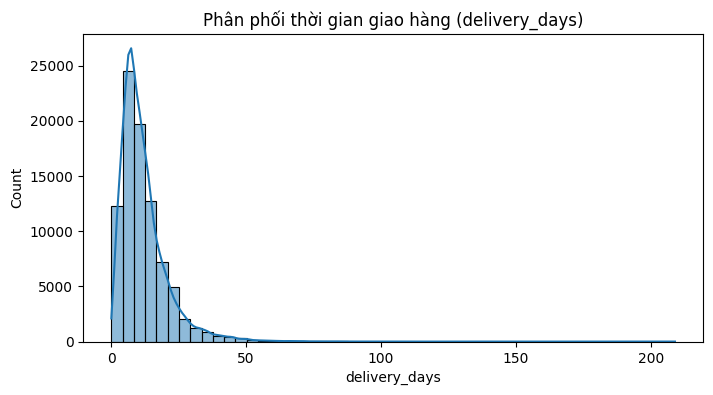

In [25]:
# Biểu đồ 1: Phân bố thời gian giao hàng
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(eda_df['delivery_days'], bins=50, kde=True)
plt.title('Phân phối thời gian giao hàng (delivery_days)')
plt.show()


Nhận Xét  Biểu đồ 1: Phân bố thời gian giao hàng
- phần lớn đơn hàng có thời gian giao nhanh ,nhưng xu hướng có thấy đơn hàng  lệch phải

-> Tồn tại các giá trị rất lớn (outliers)

-> Cần xử lý ngoại lai trước khi huấn luyện mô hình

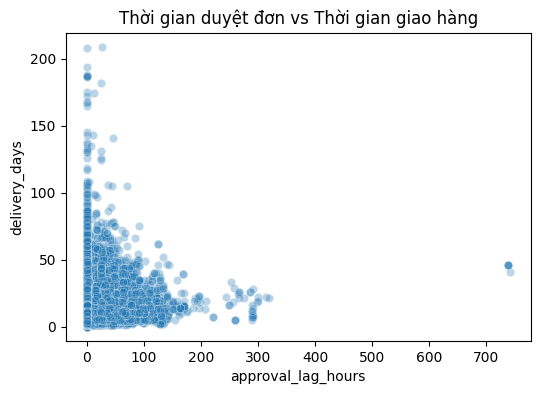

In [26]:
# Biểu đồ 2 :Thời gian duyệt đơn vs Thời gian giao hàng
eda_df['approval_lag_hours'] = (
    eda_df['order_approved_at'] - eda_df['order_purchase_timestamp']
).dt.total_seconds() / 3600

plt.figure(figsize=(6,4))
sns.scatterplot(
    x='approval_lag_hours',
    y='delivery_days',
    data=eda_df,
    alpha=0.3
)
plt.title('Thời gian duyệt đơn vs Thời gian giao hàng')
plt.show()


Nhận xét Biểu đồ 2 :Thời gian duyệt đơn vs Thời gian giao hàng
- Đơn duyệt chậm thường có thời gian giao dài hơn
- Tồn tại các outlines rất lớn lên đến 300-700 giờ, các điểm này không nhiều

->thời gian duyệt đơn chỉ ảnh hưởng một phần đến thời gian giao hàng


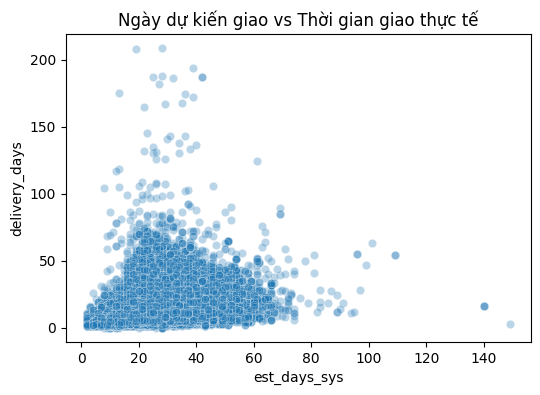

In [27]:
# Biểu Đồ 3:'Ngày dự kiến giao vs Thời gian giao thực tế
eda_df['est_days_sys'] = (
    eda_df['order_estimated_delivery_date'] - eda_df['order_purchase_timestamp']
).dt.days

plt.figure(figsize=(6,4))
sns.scatterplot(
    x='est_days_sys',
    y='delivery_days',
    data=eda_df,
    alpha=0.3
)
plt.title('Ngày dự kiến giao vs Thời gian giao thực tế')
plt.show()


Biểu Đồ 3:Ngày dự kiến giao vs Thời gian giao thực tế
- ngày giao dự kiến có liên quan đến thời gian giao thực tế, nhưng mối quan hệ không mạnh và còn nhiều sai lệch.
- Phần lớn các đơn hàng có thời gian giao dự kiến ở mức thấp  10–60 ngày và và thời gian giao thực tế tập trung ở mức thấp hơn
- Tồn tại ngoại lai có ngày dự kiến giao rất lớn trên 100 ngày nhưng thời gian giao thực tế không tương ứng.

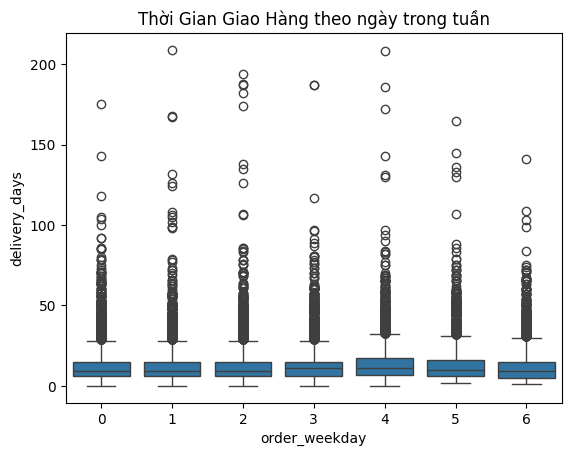

In [28]:
# Biểu đồ 4:Thời Gian Giao Hàng theo ngày trong tuần
eda_df['order_weekday'] = eda_df['order_purchase_timestamp'].dt.weekday
eda_df['order_month'] = eda_df['order_purchase_timestamp'].dt.month

sns.boxplot(x='order_weekday', y='delivery_days', data=eda_df)
plt.title('Thời Gian Giao Hàng theo ngày trong tuần')
plt.show()


Nhận xét Biểu đồ 4:Thời Gian Giao Hàng theo ngày trong tuần
- Thời gian giao hàng trung bình khác nhau giữa các ngày trong tuần.
- Đơn hàng đặt vào cuối tuần có xu hướng giao chậm hơn.

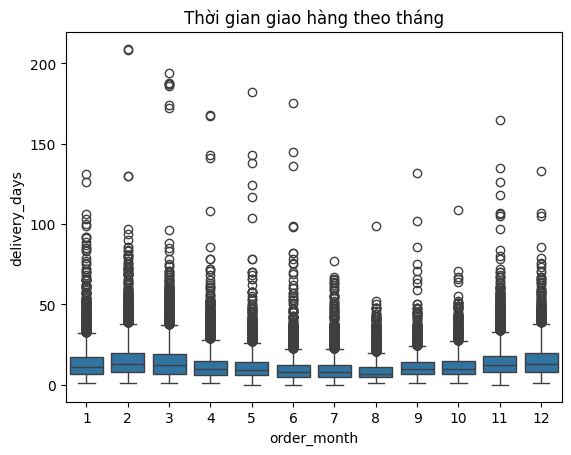

In [29]:
# Biểu đồ 5:Thời gian giao hàng theo tháng
sns.boxplot(x='order_month', y='delivery_days', data=eda_df)
plt.title('Thời gian giao hàng theo tháng')
plt.show()


Nhận xét biểu đồ 5:Thời gian giao hàng theo tháng
- Thời gian giao hàng thay đổi theo từng tháng.
- Một số tháng có thời gian giao hàng trung bình cao hơn.


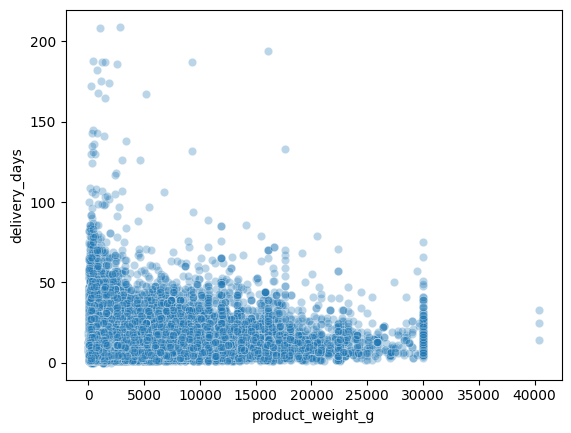

In [30]:
# Biểu đồ 6:Thời gian giao hàng vs khối lượng sản phẩm
sns.scatterplot(x="product_weight_g", y="delivery_days", data=eda_df
, alpha=0.3)
plt.show()


Nhận xét Biểu đồ 6:Thời gian giao hàng vs khối lượng sản phẩm
- Mối quan hệ giữa khối lượng và thời gian giao hàng không rõ ràng khi xét đơn lẻ.
- Dữ liệu có độ phân tán lớn và nhiều ngoại lai.

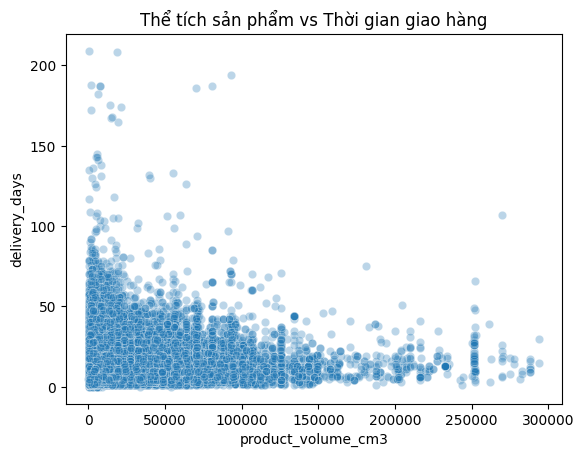

In [31]:
# Biểu đồ 7:Thời gian giao hàng vs thể tích sản phẩm
eda_df['product_volume_cm3'] = (
    eda_df['product_length_cm'] *
    eda_df['product_height_cm'] *
    eda_df['product_width_cm']
)

sns.scatterplot(
    x='product_volume_cm3',
    y='delivery_days',
    data=eda_df,
    alpha=0.3
)
plt.title('Thể tích sản phẩm vs Thời gian giao hàng')
plt.show()


Nhận xét Biểu đồ 7:Thời gian giao hàng vs thể tích sản phẩm
- Sản phẩm thể tích lớn có xu hướng giao lâu hơn
- Volume phản ánh tốt hơn weight riêng lẻ


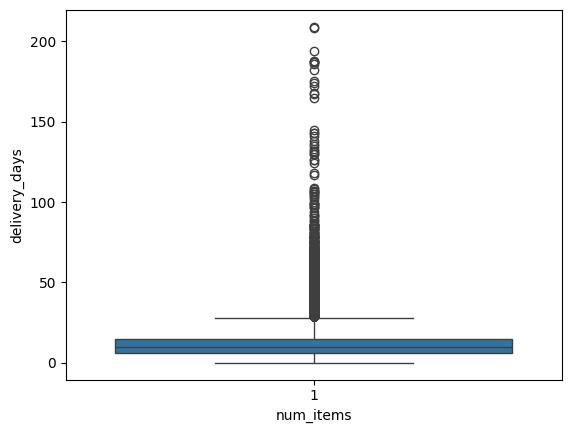

In [32]:
# Biểu đồ 8:số lượng sản phẩm trong đơn hàng
eda_df["num_items"] = eda_df.groupby("order_id")["product_id"].transform("count")
sns.boxplot(x="num_items", y="delivery_days", data=eda_df)
plt.show()


Nhận xét Biểu đồ 8:số lượng sản phẩm trong đơn hàng
- Phần lớn đơn hàng chỉ chứa 1 sản phẩm.
- Không quan sát thấy mối quan hệ rõ ràng giữa số lượng sản phẩm và thời gian giao hàng.


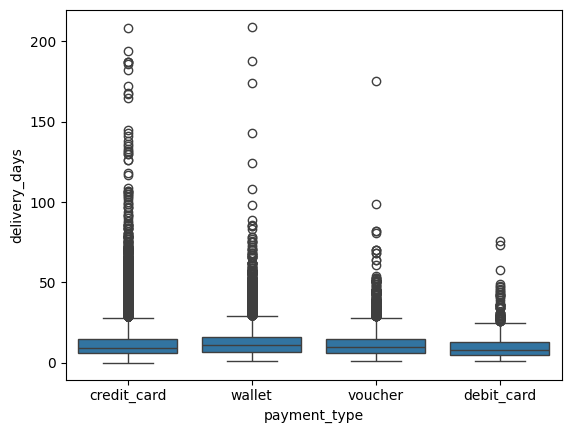

In [33]:
# Biểu đồ 9:Thời gian giao hàng theo hình thức thanh toán
sns.boxplot(x="payment_type", y="delivery_days", data=eda_df)
plt.show()


Nhận xét Biểu đồ 9:Thời gian giao hàng theo hình thức thanh toán
- Thời gian giao hàng không khác biệt đáng kể giữa các phương thức thanh toán.


In [34]:
print("Thời gian giao hàng trung bình theo bang:")
eda_df.groupby("customer_state")["delivery_days"].mean().sort_values()


Thời gian giao hàng trung bình theo bang:


customer_state
SP     8.229674
MG    11.507323
PR    11.589306
DF    12.379487
SC    14.497944
RS    14.559951
GO    14.718062
RJ    14.746867
MS    15.093502
ES    15.112549
TO    16.872428
MT    17.365196
PE    17.831142
PI    18.569682
BA    18.863968
RN    19.334218
RO    19.860759
PB    20.091667
CE    20.253406
SE    20.720539
MA    20.859038
AC    20.986486
PA    22.794743
AL    24.206154
AM    25.847826
AP    27.522388
RR    27.972973
Name: delivery_days, dtype: float64

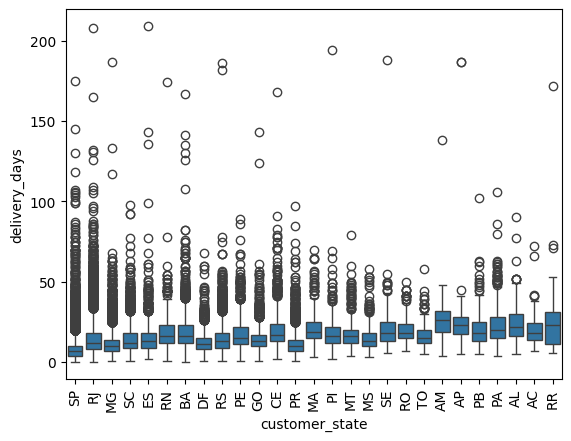

In [35]:
# Biểu đồ 10:Thời gian giao hàng trung bình theo bang
sns.boxplot(x="customer_state", y="delivery_days", data=eda_df)
plt.xticks(rotation=90)
plt.show()


Nhận xét Biểu đồ 10:Thời gian giao hàng trung bình theo bang
- Có sự khác biệt rõ rệt về thời gian giao hàng giữa các bang.
- Vị trí địa lý ảnh hưởng đến khoảng cách vận chuyển và tốc độ giao hàng.

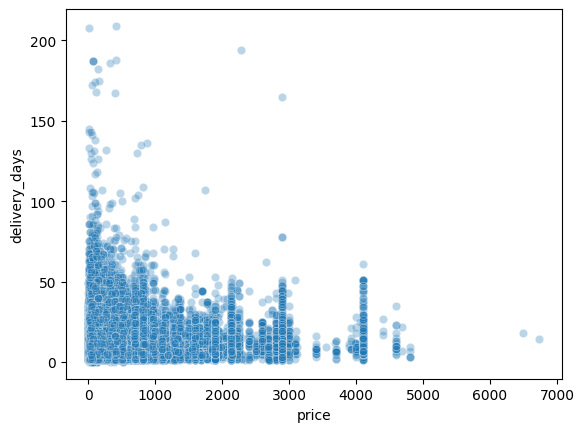

In [36]:
# Biểu đồ 11: Giá sản phẩm  vs Thời gian giao hàng
sns.scatterplot(x="price", y="delivery_days", data=eda_df, alpha=0.3)
plt.show()




Nhận xét Biểu đồ 11: Giá sản phẩm  vs Thời gian giao hàng

* Đơn hàng tập trung ở mức giá thấp - trung bình, với thời gian giao hàng phân bố rộng từ nhanh đến chậm.

* Các đơn hàng có giá cao không có xu hướng giao nhanh hay chậm hơn một cách nhất quán so với các đơn hàng giá thấp.

* Xuất hiện một số ngoại lai với thời gian giao hàng rất dài ở cả nhóm giá thấp và giá cao, cho thấy giá sản phẩm không phải yếu tố quyết định đến thời gian giao hàng.

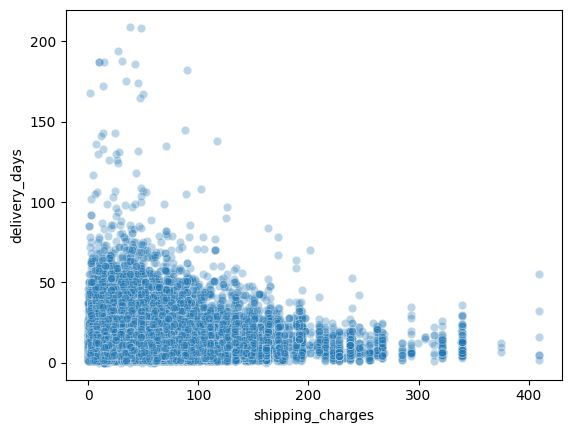

In [37]:
# Biểu đồ 12: Phí vận chuyển vs Thời gian giao hàng
sns.scatterplot(x="shipping_charges", y="delivery_days", data=eda_df, alpha=0.3)
plt.show()

Nhận xét Biểu đồ 12: Phí vận chuyển vs Thời gian giao hàng
* Đa số các đơn hàng tập trung ở mức phí vận chuyển thấp

* Một quan sát thú vị là các đơn hàng có phí vận chuyển cao thường có thời gian giao hàng ổn định hơn và ít bị trễ cực đoan hơn so với các đơn hàng giá rẻ.

## Kết luận từ EDA

- Thời gian giao hàng có phân phối lệch phải và tồn tại nhiều giá trị ngoại lai.
- Các yếu tố thời gian (ngày trong tuần, tháng) và vị trí địa lý của khách hàng ảnh hưởng rõ rệt đến thời gian giao hàng.
- Các đặc trưng vật lý của sản phẩm (khối lượng, thể tích) có ảnh hưởng nhất định đến tốc độ giao hàng.
- Số lượng sản phẩm trong đơn hàng và phương thức thanh toán không cho thấy ảnh hưởng rõ ràng.
- Giá sản phẩm và phí vận chuyển không phải yếu tố chính nhưng vẫn được giữ để mô hình học các mối quan hệ phi tuyến.

EDA đóng vai trò hỗ trợ lựa chọn đặc trưng cho bước Feature Engineering và huấn luyện mô hình.


#FEATURE ENGINEERING

In [38]:
# Sao chép dữ liệu gốc để Feature Engineer
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87427 entries, 0 to 2529485
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       87427 non-null  object        
 1   customer_id                    87427 non-null  object        
 2   order_status                   87427 non-null  object        
 3   order_purchase_timestamp       87427 non-null  datetime64[ns]
 4   order_approved_at              87427 non-null  datetime64[ns]
 5   order_delivered_timestamp      87427 non-null  datetime64[ns]
 6   order_estimated_delivery_date  87427 non-null  datetime64[ns]
 7   customer_zip_code_prefix       87427 non-null  int64         
 8   customer_city                  87427 non-null  object        
 9   customer_state                 87427 non-null  object        
 10  product_id                     87427 non-null  object        
 11  seller_id         

In [39]:
df.shape

(87427, 23)

In [40]:
# tạo biến mục tiêu
df["delivery_days"] = (
    df["order_delivered_timestamp"] -
    df["order_purchase_timestamp"]
).dt.days

# Lọc dữ liệu hợp lệ
df = df[
    df["delivery_days"].notnull() & (df["delivery_days"] >= 0)
]


In [41]:
# fuature về thời gian
# Ngày trong tuần (0 = Monday)
df["order_weekday"] = df["order_purchase_timestamp"].dt.weekday

# Tháng trong năm
df["order_month"] = df["order_purchase_timestamp"].dt.month


# Thời gian duyệt đơn (giờ)
df["approval_lag_hours"] = (
    df["order_approved_at"] -
    df["order_purchase_timestamp"]
).dt.total_seconds() / 3600


In [42]:
# Feature hệ thống
df["est_days_sys"] = (
    df["order_estimated_delivery_date"] -
    df["order_purchase_timestamp"]
).dt.days



In [43]:
# Feature vật lý (KHÔNG cần fill lại nếu df đã fill)
df["product_volume_cm3"] = (
    df["product_length_cm"] *
    df["product_height_cm"] *
    df["product_width_cm"]
)

In [44]:
feature_cols = [
    # Địa lý
    "customer_zip_code_prefix",
    "customer_state",

    # Thời gian
    "order_weekday",
    "order_month",

    # Vận hành / hệ thống
    "approval_lag_hours",
    "est_days_sys",

    # Vật lý & chi phí
    "product_weight_g",
    "product_volume_cm3",
    "price",
    "shipping_charges"
]



##Xử Lý Outlines

In [45]:
# ===== OUTLIER HANDLING FOR TARGET =====

Q1 = df["delivery_days"].quantile(0.25)
Q3 = df["delivery_days"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

print("Upper bound delivery_days:", upper_bound)

df = df[
    (df["delivery_days"] >= 0) &
    (df["delivery_days"] <= upper_bound)
]


print("Sau khi xử lý outlier:", df.shape)


Upper bound delivery_days: 28.5
Sau khi xử lý outlier: (83084, 29)


#TRAIN / TEST SPLIT (80 / 20)

In [46]:
X = df[feature_cols]
y = df["delivery_days"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (83084, 10)
y shape: (83084,)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [48]:
num_cols = [
    "customer_zip_code_prefix",
    "approval_lag_hours",
    "est_days_sys",
    "product_weight_g",
    "product_volume_cm3",
    "price",
    "shipping_charges"
]

cat_cols = [
    "customer_state",
    "order_weekday",
    "order_month"
]


In [49]:
# ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


# Huấn Luyện Mô Hình

In [50]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from xgboost import XGBRegressor

# Model với tham số tối ưu hơn RandomForest cũ
model = Pipeline([
    ('prep', preprocessor),
    ('reg', XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

model.fit(X_train, y_train)

,steps,"[('prep', ...), ('reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [53]:
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} ngày")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

MAE: 3.29 ngày
R2 Score: 0.4828


In [56]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree - Cây quyết định đơn lẻ
dt_model = Pipeline([
    ("prep", preprocessor),
    ("model", DecisionTreeRegressor(
        max_depth=15,               # Giới hạn độ sâu để tránh overfitting
        min_samples_split=10,       # Tối thiểu 10 mẫu để split node
        min_samples_leaf=5,         # Mỗi leaf phải có ít nhất 5 mẫu
        random_state=42
    ))
])

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R2 :", r2_score(y_test, y_pred_dt))

Decision Tree
MAE: 3.7636572042909484
R2 : 0.3252472733857886


In [54]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline([
     ("prep", preprocessor),
     ("model", RandomForestRegressor(
         n_estimators=200,
         max_depth=15,
         random_state=42,
         n_jobs=-1
     ))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 :", r2_score(y_test, y_pred_rf))


Random Forest
MAE: 3.4329081337739265
R2 : 0.4506888402899307
